In [1]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [2]:
import jieba
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline
data = []
with open("/content/drive/MyDrive/Colab第三階段202505/ch12_20250708/data_source.txt", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line.endswith(","):
            line = line[:-1]   # 去掉行尾的逗號
        if line:
            tup = eval(line)
            data.append(tup)
print(data)
print('分類結果與分類的資料都是文字，全部都要轉換為數字嗎?')
print('依照資料來做評估，如果不需要做one hot轉換，不需要轉換為數字')
print('可評估詞彙的重要性來進行skleran分類，但是如果字串太多或程式執行緩慢，請改用神經網路方式進行')
texts, labels = zip(*data)  # 將data資料拆解分別儲存至texts與labels
def chinese_tokenizer(text):
  return jieba.lcut(text)
pipeline = Pipeline([('vectorizer', TfidfVectorizer(tokenizer = chinese_tokenizer, ngram_range = (1,4))), ('classifier',MultinomialNB())])
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size = 0.2, random_state = 42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('預測結果:')
print(y_pred)
print('實際結果:')
print(y_test)
print('準確率:')
print(accuracy_score(y_test, y_pred))
print('詳細分類報告:')
print(classification_report(y_test, y_pred))
new_text = ['量子運算是未來的趨勢']
predicted1 = pipeline.predict(new_text)
print('預測結果:')
print(predicted1)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...


[('喬科維奇溫網99勝到手 衛冕冠軍卡雷茨科娃鏖戰晉級', '運動'), ('吳詩儀碾壓對手 WB盃哈薩克拳賽晉4強保底銅牌', '運動'), ('瓊斯盃台灣女籃不敵世大運女籃 陳薇安：虛心檢討', '運動'), ('世大運女籃培訓隊防守建功 瓊斯盃驚險扳倒台灣隊', '運動'), ('謝淑薇攜拉脫維亞搭檔 溫網女雙闖頭關', '運動'), ('利物浦球星裘達車禍身亡 C羅：這沒道理', '運動'), ('對手又抱又摔卻獲勝 WB盃哈薩克賽黃筱雯8強敗', '運動'), ('中職下半季4日開打 龍隊推徐若熙先發對獅隊', '運動'), ('味全龍劉家豪率捕手群做公益 送暖喜憨兒基金會', '運動'), ('利物浦足球球星裘達車禍身亡 上個月剛為葡萄牙歐國聯摘冠', '運動'), ('114年體育推手獎受理推薦 盼更多企業贊助', '運動'), ('LLB亞太區少棒賽 北市東園國小擊敗韓國奪冠', '運動'), ('LLB亞太區次青少棒賽 台中中山奪冠出征世界賽', '運動'), ('道奇柯蕭達3000K里程碑 MLB史上第20人、左投第4人', '運動'), ('NBA獨行俠與狀元佛萊格簽4年約 傳控衛艾克森回歸', '運動'), ('鄧愷威3A先發5局無失分 飆近2季新高11K奪勝投', '運動'), ('林維恩中繼3局好投獲高A首勝 陳柏毓先發奪勝', '運動'), ('獅隊再補新韓援安惠志 與文慧真趙娟週組韓籍3本柱', '運動'), ('世界自由潛水泳池錦標賽 台灣獲3金1銀3銅', '運動'), ('道奇巨投柯蕭3000K達陣 大聯盟史上第20人', '運動'), ('Google AI創作工具登台 一句話生成微距珍奶影片', '科技'), ('智利ALMA望遠鏡拍到宇宙初期元素影像 可研究恆星如何誕生', '科技'), ('甲烷衛星迷失太空 貝佐斯贊助溫室氣排追蹤計畫受挫', '科技'), ('OpenAI：未計劃用Google自製AI晶片TPU', '科技'), ('Netflix攜手NASA 火箭升空太空任務盡情看', '科技'), ('都市也能種菜 新加坡室內農場翻轉糧食安全想像', '科技'), ('AI淨零／AI好夯掀散熱戰 其陽雙相液冷衝刺節能減碳', '科技'), ('法國挪威簽跨境碳封存協議 助歐洲打造統一CCS市場', '科技'), 

Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.104 seconds.
DEBUG:jieba:Loading model cost 1.104 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


預測結果:
['娛樂' '文化' '科技' '娛樂' '運動' '科技' '產經' '娛樂' '娛樂' '科技' '科技' '娛樂' '文化' '科技'
 '文化' '科技' '科技' '運動' '科技' '產經']
實際結果:
['產經', '文化', '娛樂', '運動', '娛樂', '娛樂', '產經', '文化', '運動', '運動', '科技', '產經', '文化', '科技', '文化', '運動', '科技', '運動', '娛樂', '產經']
準確率:
0.45
詳細分類報告:
              precision    recall  f1-score   support

          娛樂       0.00      0.00      0.00         4
          文化       1.00      0.75      0.86         4
          產經       1.00      0.50      0.67         4
          科技       0.38      1.00      0.55         3
          運動       0.50      0.20      0.29         5

    accuracy                           0.45        20
   macro avg       0.57      0.49      0.47        20
weighted avg       0.58      0.45      0.46        20

預測結果:
['文化']


['"喬科維奇溫網99勝到手 衛冕冠軍卡雷茨科娃鏖戰晉級"', '"吳詩儀碾壓對手 WB盃哈薩克拳賽晉4強保底銅牌"', '"瓊斯盃台灣女籃不敵世大運女籃 陳薇安：虛心檢討"', '"世大運女籃培訓隊防守建功 瓊斯盃驚險扳倒台灣隊"', '"謝淑薇攜拉脫維亞搭檔 溫網女雙闖頭關"', '"利物浦球星裘達車禍身亡 C羅：這沒道理"', '"對手又抱又摔卻獲勝 WB盃哈薩克賽黃筱雯8強敗"', '"中職下半季4日開打 龍隊推徐若熙先發對獅隊"', '"味全龍劉家豪率捕手群做公益 送暖喜憨兒基金會"', '"利物浦足球球星裘達車禍身亡 上個月剛為葡萄牙歐國聯摘冠"', '"114年體育推手獎受理推薦 盼更多企業贊助"', '"LLB亞太區少棒賽 北市東園國小擊敗韓國奪冠"', '"LLB亞太區次青少棒賽 台中中山奪冠出征世界賽"', '"道奇柯蕭達3000K里程碑 MLB史上第20人、左投第4人"', '"NBA獨行俠與狀元佛萊格簽4年約 傳控衛艾克森回歸"', '"鄧愷威3A先發5局無失分 飆近2季新高11K奪勝投"', '"林維恩中繼3局好投獲高A首勝 陳柏毓先發奪勝"', '"獅隊再補新韓援安惠志 與文慧真趙娟週組韓籍3本柱"', '"世界自由潛水泳池錦標賽 台灣獲3金1銀3銅"', '"道奇巨投柯蕭3000K達陣 大聯盟史上第20人"', '"Google AI創作工具登台 一句話生成微距珍奶影片"', '"智利ALMA望遠鏡拍到宇宙初期元素影像 可研究恆星如何誕生"', '"甲烷衛星迷失太空 貝佐斯贊助溫室氣排追蹤計畫受挫"', '"OpenAI：未計劃用Google自製AI晶片TPU"', '"Netflix攜手NASA 火箭升空太空任務盡情看"', '"都市也能種菜 新加坡室內農場翻轉糧食安全想像"', '"AI淨零／AI好夯掀散熱戰 其陽雙相液冷衝刺節能減碳"', '"法國挪威簽跨境碳封存協議 助歐洲打造統一CCS市場"', '"分析師：蘋果押寶頭戴裝置 至少7專案開發中"', '"日本H2A火箭最後一次發射 送氣候觀測衛星入軌道"', '"AI為達成目的學會扯謊甚至威脅創作者 專家示警"', '"孫正義：軟銀目標10年內成為超級AI平台最大供應商"', '"公理4號任務對接國際太空站 將進行約60項實驗"', '"輝達股價創新高 黃仁勳：機器人是潛在成長

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0 "喬科維奇溫網99勝到手 衛冕冠軍卡雷茨科娃鏖戰晉級" -0.04075651224191201 -0.008432007398431113
1 "吳詩儀碾壓對手 WB盃哈薩克拳賽晉4強保底銅牌" -0.041266917064088776 -0.04859356266588678
2 "瓊斯盃台灣女籃不敵世大運女籃 陳薇安：虛心檢討" -0.03555686063808312 -0.02056474585577966
3 "世大運女籃培訓隊防守建功 瓊斯盃驚險扳倒台灣隊" -0.036742089174576276 -0.02119260241166415
4 "謝淑薇攜拉脫維亞搭檔 溫網女雙闖頭關" -0.03936101851374209 -0.009104671504494627
5 "利物浦球星裘達車禍身亡 C羅：這沒道理" -0.06293008871341438 0.021139388800364336
6 "對手又抱又摔卻獲勝 WB盃哈薩克賽黃筱雯8強敗" -0.03085146191201774 -0.05282016066028511
7 "中職下半季4日開打 龍隊推徐若熙先發對獅隊" -0.01161708548100325 -0.04358656902240747
8 "味全龍劉家豪率捕手群做公益 送暖喜憨兒基金會" -0.040663918708328466 -0.03360465117730038
9 "利物浦足球球星裘達車禍身亡 上個月剛為葡萄牙歐國聯摘冠" -0.07084145786989218 0.018781507700441156
10 "114年體育推手獎受理推薦 盼更多企業贊助" -0.007871040517480414 -0.012785673042922278
11 "LLB亞太區少棒賽 北市東園國小擊敗韓國奪冠" -0.03139346477805087 0.07946964091225805
12 "LLB亞太區次青少棒賽 台中中山奪冠出征世界賽" -0.03547974253416742 0.08030162421813851
13 "道奇柯蕭達3000K里程碑 MLB史上第20人、左投第4人" -0.08086812633694718 -0.1514495254974281
14 "NBA獨行俠與狀元佛萊

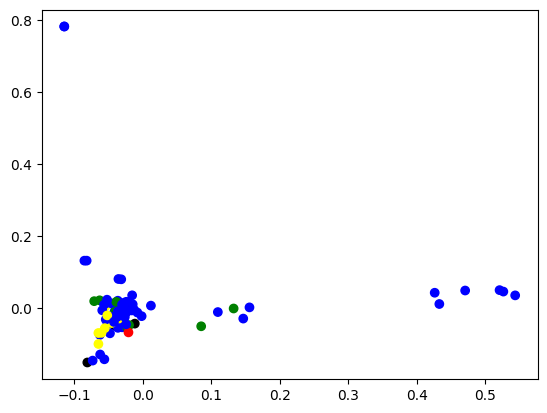

In [3]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
texts = []
with open("/content/drive/MyDrive/Colab第三階段202505/ch12_20250708/data_source2.txt", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        texts.append(line)
print(texts)
def chinese_tokenizer(text):
    return jieba.lcut(text)
vectorizer = TfidfVectorizer(tokenizer = chinese_tokenizer, ngram_range = (1,2))
X = vectorizer.fit_transform(texts)
num_clusters = 5
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
kmeans.fit(X)
labels = kmeans.labels_
for i, label in enumerate(labels):
    print("字串:", texts[i], " => 分群: ", label)
pca = PCA(n_components = 2)
scatter_plot_points = pca.fit_transform(X.toarray())
colors = ["red","blue","green","yellow","black"]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, c = [colors[d] for d in labels])
for i, txt in enumerate(texts):
    print(i, txt, x_axis[i], y_axis[i])
plt.show()

In [4]:
import os, time
import jieba
t1 = time.time()
def read_files(file_path):
  texts = []
  for file_name in os.listdir(file_path):
    file_path_name = os.path.join(file_path, file_name)
    if file_name.endswith('.txt'):
      with open(file_path_name, 'r', encoding='utf-8') as f:
        texts.append(f.read())
  return texts
def preprocess_text(text):
  return ' '.join(jieba.cut(text))
file_path = '/content/drive/MyDrive/Colab第三階段202505/ch12_20250708/CM'
texts = read_files(file_path)
print(texts)
processed_texts = [preprocess_text(text) for text in texts]
print('分詞後:', processed_texts)
print('TfidfVectorizer')
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts)
print(X.toarray())
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
print('CountVectorizer')
X = vectorizer.fit_transform(processed_texts)
print(X.toarray())
ngrams = vectorizer.get_feature_names_out()
print(ngrams)
import pandas as pd
ngram_df = pd.DataFrame(X.toarray(),columns = ngrams)
print(ngram_df)
print('ngram_df形狀:\n', ngram_df.shape)
ngram_df.to_html('ngram_df.html')
def get_top_ngrams(now, top_n = 10):
  top_ngrams = now.sort_values(ascending = False).head(top_n)
  return list(zip(top_ngrams.index, top_ngrams.values))
doc_id = 0
top_ngrams = get_top_ngrams(ngram_df.iloc[doc_id])
print('文件ID:', doc_id, '中出現頻率最高的N-grams:')
for ngram,count in top_ngrams:
  print(ngram, ':', count)
t2 = time.time()
print('執行時間:', t2 - t1)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.','this document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()
print(X)
ngrams = vectorizer.get_feature_names_out()
print(ngrams)
import pandas as pd
ngram_df = pd.DataFrame(X, columns = ngrams)
print(ngram_df)
print('ngram_df形狀:\n', ngram_df.shape)
print('')
print('想要知道每一段落內的每一個詞彙重要性')
from sklearn.feature_extraction.text import TfidfTransformer
tfidfobject = TfidfTransformer()
tfidf0 = tfidfobject.fit_transform(X)
tfidf1 = tfidfobject.fit_transform(X).toarray()
print('tfidf訓練後的結果')
print(tfidf0)
print('tfidf訓練後的結果轉為陣列')
print(tfidf1)
tfidf_df = pd.DataFrame(tfidf1, columns = ngrams)
print(tfidf_df)
tfidf_df.to_html('tfidf.html')
print('依據重要性，找出段落與段落之間相似度的比較')
from sklearn.metrics.pairwise import cosine_similarity
print('index=2的字串與全部字串的相似度比較，轉為陣列')
print(cosine_similarity(tfidf_df.iloc[2].values.reshape(1,-1), tfidf_df))

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    1      0     1
1    0         2      0   1    0       1    1      0     1
2    1         0      0   1    1       0    1      1     1
3    0         1      1   1    0       0    1      0     1
ngram_df形狀:
 (4, 9)

想要知道每一段落內的每一個詞彙重要性
tfidf訓練後的結果
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (4, 9)>
  Coords	Values
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 3)	0.38408524091481483
  (0, 6)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 1)	0.6876235979836938
  (1, 3)	0.281088674033753
  (1, 5)	0.5386476208856763
  (1, 6)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 0)	0.511848512707169
  (2, 3)	0.267103787642168
  (2, 4)	0.511848512707169
  (2, 6)	0.267103787642

In [6]:
import jieba
documents = ["我喜歡機器學習。","機器學習是人工智慧的一個領域。","深度學習是機器學習的一個子領域。","人工智慧與機器學習正在改變這個世界。","技術的未來在於人工智慧與機器學習。","理解機器學習可以帶來激勵人心的各種機會。",]
def chinese_tokenizer(text):
  return jieba.lcut(text)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer = chinese_tokenizer)
X = tfidf_vectorizer.fit_transform(documents).toarray()
print('依據重要性，找出段落與段落之間相似度的比較')
from sklearn.metrics.pairwise import cosine_similarity
print('index = 1的字串與全部字串的相似度比較，轉為陣列')
print(cosine_similarity(X[1].reshape(1,-1), X))

依據重要性，找出段落與段落之間相似度的比較
index = 1的字串與全部字串的相似度比較，轉為陣列
[[0.18920526 1.         0.57962069 0.2301363  0.29684354 0.17240486]]


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
